In [36]:
from PIL import Image
import numpy as np

image = Image.open("exp.jpg").resize((10, 10)).convert("RGB")
pixels = np.array(image)
print("Matrix shape:", pixels.shape)  # (4, 3, 3)
print("Red Values")
print("Top-left pixel:", pixels[0, 0])  # [R, G, B]
print(pixels[:, :, 0])  # Prints 2D matrix of red values
print("Green values")
print(pixels[:, :, 1])  # Prints 2D matrix of green values
print("Blue values")
print(pixels[:, :, 2])  # Prints 2D matrix of balue values
print("Flattened memory view:", pixels.flatten()[:12])  # First 4 pixels


# So this code shows me the shape of the image matrix, the RGB values of the top-left pixel, and a 2D matrix of red values.
# It also prints the first 4 pixels in a flattened memory view.



Matrix shape: (10, 10, 3)
Red Values
Top-left pixel: [4 5 7]
[[  4   5   5   6   5   5   5   5   3   5]
 [  4   8   8   7   4   3   6   7   6   7]
 [  4   8   6  11  43  44   5   5   6   7]
 [  3   6   7  87 193 235 152  11   4   7]
 [  1   0  23 124 200 229 245 100   0   7]
 [  0   0  21 102 165 230 253 152   0   6]
 [  1   0  40 145 143 199 241 107   0   5]
 [  0   0  54 170 120 141 135  16   3   5]
 [  1   5  45 136  89  21   5   1   6   4]
 [  1   4  46 128  53   0   1   1   4   2]]
Green values
[[  5   6   6   7   7   6   6   5   4   6]
 [  5   9   9   8   5   4   7   7   6   8]
 [  5   9   8  12  40  40   6   5   6   8]
 [  5   7   7  73 165 217 144  10   4   8]
 [  2   1  21 106 169 188 201  90   0   8]
 [  0   0  20  81 121 194 232 139   0   8]
 [  1   0  42 144 122 167 210  99   0   7]
 [  0   0  56 171 110 122 118  15   4   8]
 [  1   5  47 138  88  19   6   3   7   7]
 [  3   5  49 134  56   0   3   3   5   5]]
Blue values
[[  7   8   8   9   9   8   8   8   4   8]
 [  7  11

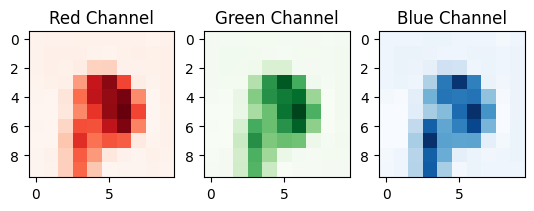

In [37]:
import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
plt.imshow(pixels[:, :, 0], cmap='Reds')
plt.title("Red Channel")

plt.subplot(1, 3, 2)
plt.imshow(pixels[:, :, 1], cmap='Greens')
plt.title("Green Channel")

plt.subplot(1, 3, 3)
plt.imshow(pixels[:, :, 2], cmap='Blues')
plt.title("Blue Channel")

plt.show()


# Pereforming Run Length Encoding

In [38]:
def rle_encode(channel_data):
    """
    Encodes a 1D list/array using run-length encoding.
    Input: [255, 255, 255, 0, 0, 1]
    Output: [(255, 3), (0, 2), (1, 1)]
    """
    if len(channel_data) == 0:
        return []

    encoded = []
    prev_val = channel_data[0]
    count = 1

    for curr in channel_data[1:]:
        if curr == prev_val:
            count += 1
        else:
            encoded.append((prev_val, count))
            prev_val = curr
            count = 1

    encoded.append((prev_val, count))  # Final group
    return encoded


In [39]:
def rle_decode(encoded_data):
    """
    Decodes a run-length encoded list back to original.
    Input: [(255, 3), (0, 2), (1, 1)]
    Output: [255, 255, 255, 0, 0, 1]
    """
    decoded = []
    for val, count in encoded_data:
        decoded.extend([val] * count)
    return decoded


In [41]:
from PIL import Image
import numpy as np

image = Image.open("exp2.jpg").resize((128, 128)).convert("RGB")
pixels = np.array(image)

# Red channel only
red_channel = pixels[:, :, 0].flatten()

# Compress
encoded_red = rle_encode(red_channel)
print("RLE Encoded Length:", len(encoded_red))

# Decompress
decoded_red = rle_decode(encoded_red)
print("Is Lossless?", np.array_equal(red_channel, decoded_red))
# Check if the original and decompressed arrays are the same

RLE Encoded Length: 9476
Is Lossless? True


# Applying Threshold RLE

In [ ]:
from PIL import Image
import numpy as np

# Load grayscale version of image
image = Image.open("exp7.jpg").resize((128, 128)).convert("L")
pixels = np.array(image)

# Apply threshold: anything above 128 becomes 255, below becomes 0
thresholded = (pixels > 128).astype(np.uint8) * 255

# Flatten the image for RLE
flat = thresholded.flatten()

In [22]:
def rle_encode(channel_data):
    """
    Encodes a 1D list/array using run-length encoding.
    Input: [255, 255, 255, 0, 0, 1]
    Output: [(255, 3), (0, 2), (1, 1)]
    """
    if len(channel_data) == 0:
        return []

    encoded = []
    prev_val = channel_data[0]
    count = 1

    for curr in channel_data[1:]:
        if curr == prev_val:
            count += 1
        else:
            encoded.append((prev_val, count))
            prev_val = curr
            count = 1

    encoded.append((prev_val, count))  # Final group
    return encoded

def rle_decode(encoded_data):
    """
    Decodes a run-length encoded list back to original.
    Input: [(255, 3), (0, 2), (1, 1)]
    Output: [255, 255, 255, 0, 0, 1]
    """
    decoded = []
    for val, count in encoded_data:
        decoded.extend([val] * count)
    return decoded

encoded_bw = rle_encode(flat)
print("Thresholded RLE Length:", len(encoded_bw))

# Confirm it's lossless
decoded_bw = np.array(rle_decode(encoded_bw), dtype=np.uint8).reshape(thresholded.shape)
print("Lossless Reconstruction:", np.array_equal(thresholded, decoded_bw))
Image.fromarray(thresholded).save("thresholded_output.png")


Thresholded RLE Length: 1261
Lossless Reconstruction: True


# Trying Differential Encoding

In [45]:
def delta_encode(data):
    encoded = [data[0]]  # first pixel stays as is
    for i in range(1, len(data)):
        encoded.append(data[i] - data[i - 1])
    return encoded

def delta_decode(encoded):
    decoded = [encoded[0]]
    for i in range(1, len(encoded)):
        decoded.append(decoded[-1] + encoded[i])
    return decoded


In [51]:
from PIL import Image
import numpy as np
# Load grayscale image
image = Image.open("exp2.jpg").resize((128, 128)).convert("L")
pixels = np.array(image)
flat = pixels.flatten()

# Apply delta encoding
delta = delta_encode(flat)

# Decode and check lossless
recovered = delta_decode(delta)
print("Is Lossless?", np.array_equal(flat, recovered))

print("Original sample:", flat[:10])
print("Delta sample:", delta[:10])

Is Lossless? True
Original sample: [1 1 0 0 0 0 0 1 0 1]
Delta sample: [np.uint8(1), np.uint8(0), np.uint8(255), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(1), np.uint8(255), np.uint8(1)]


# Delta + base64 encoding

In [6]:
from PIL import Image
import numpy as np
import base64

def delta_encode(data):
    delta = [data[0]]
    for i in range(1, len(data)):
        delta.append(np.uint8(data[i] - data[i - 1]))
    return delta

def delta_decode(delta):
    data = [delta[0]]
    for i in range(1, len(delta)):
        val = int(data[i - 1]) + int(delta[i])
        data.append(np.uint8(val % 256))  # Wrap-around safely
    return data


def encode_channel(channel):
    flat = channel.flatten()
    delta = delta_encode(flat)
    delta_bytes = bytes(delta)
    encoded_str = base64.b64encode(delta_bytes).decode()
    return encoded_str

def decode_channel(encoded_str, shape):
    delta_bytes = base64.b64decode(encoded_str)
    delta_list = list(delta_bytes)
    recovered_flat = delta_decode(delta_list)
    return np.array(recovered_flat, dtype=np.uint8).reshape(shape)

# Load image
image = Image.open("exp.jpg").resize((128, 128)).convert("RGB")
pixels = np.array(image)
shape = pixels[:, :, 0].shape  # Shape of one channel

# Encode all channels
R_encoded = encode_channel(pixels[:, :, 0])
G_encoded = encode_channel(pixels[:, :, 1])
B_encoded = encode_channel(pixels[:, :, 2])

print("R Encoded Length:", len(R_encoded))
print("G Encoded Length:", len(G_encoded))
print("B Encoded Length:", len(B_encoded))

# Decode all channels
R = decode_channel(R_encoded, shape)
G = decode_channel(G_encoded, shape)
B = decode_channel(B_encoded, shape)

# Stack them back
reconstructed = np.stack([R, G, B], axis=2)

# Check lossless
print("Lossless?", np.array_equal(pixels, reconstructed))

# Save to verify visually (optional)
Image.fromarray(reconstructed).save("reconstructed.jpg")


R Encoded Length: 21848
G Encoded Length: 21848
B Encoded Length: 21848
Lossless? True


C:\Users\ELIXPO\AppData\Local\Temp\ipykernel_19868\2545737852.py:8: RuntimeWarning: overflow encountered in scalar subtract
  delta.append(np.uint8(data[i] - data[i - 1]))


# RLE + DELTA + BASE64

In [7]:
from PIL import Image
import numpy as np
import base64

# ----- Delta Encoding and Decoding -----
def delta_encode(data):
    delta = [data[0]]
    for i in range(1, len(data)):
        delta.append(np.uint8(data[i] - data[i - 1]))
    return delta

def delta_decode(delta):
    data = [delta[0]]
    for i in range(1, len(delta)):
        val = int(data[i - 1]) + int(delta[i])
        data.append(np.uint8(val % 256))
    return data

# ----- RLE Encoding and Decoding -----
def rle_encode(data):
    encoded = []
    prev = data[0]
    count = 1
    for val in data[1:]:
        if val == prev and count < 255:  # stay within 1-byte range
            count += 1
        else:
            encoded.extend([prev, count])
            prev = val
            count = 1
    encoded.extend([prev, count])
    return encoded

def rle_decode(data):
    decoded = []
    for i in range(0, len(data), 2):
        value = data[i]
        count = data[i + 1]
        decoded.extend([value] * count)
    return decoded

# ----- Channel Encoding/Decoding -----
def encode_channel(channel):
    flat = channel.flatten()
    delta = delta_encode(flat)
    rle = rle_encode(delta)
    rle_bytes = bytes(rle)
    encoded_str = base64.b64encode(rle_bytes).decode()
    return encoded_str

def decode_channel(encoded_str, shape):
    rle_bytes = base64.b64decode(encoded_str)
    rle_list = list(rle_bytes)
    delta = rle_decode(rle_list)
    recovered_flat = delta_decode(delta)
    return np.array(recovered_flat, dtype=np.uint8).reshape(shape)

# ----- Main Flow -----
# Load image
image = Image.open("exp.jpg").resize((128, 128)).convert("RGB")
pixels = np.array(image)
shape = pixels[:, :, 0].shape

# Encode each channel
R_encoded = encode_channel(pixels[:, :, 0])
G_encoded = encode_channel(pixels[:, :, 1])
B_encoded = encode_channel(pixels[:, :, 2])

print("Encoded Lengths:")
print("R:", len(R_encoded))
print("G:", len(G_encoded))
print("B:", len(B_encoded))

# Decode and reconstruct image
R = decode_channel(R_encoded, shape)
G = decode_channel(G_encoded, shape)
B = decode_channel(B_encoded, shape)

reconstructed = np.stack([R, G, B], axis=2)

# Verify and save
print("Lossless?", np.array_equal(pixels, reconstructed))
Image.fromarray(reconstructed).save("reconstructed_rle_delta.jpg")


Encoded Lengths:
R: 32488
G: 32956
B: 33452
Lossless? True


C:\Users\ELIXPO\AppData\Local\Temp\ipykernel_19868\1213032695.py:9: RuntimeWarning: overflow encountered in scalar subtract
  delta.append(np.uint8(data[i] - data[i - 1]))


# Comparing 

- RLE + DELTA
- PLAIN BASE64
- DELTA ITSELF
- GRAYSCALE

C:\Users\ELIXPO\AppData\Local\Temp\ipykernel_19868\988053037.py:10: RuntimeWarning: overflow encountered in scalar subtract
  delta.append(np.uint8(data[i] - data[i - 1]))


🔸 Original RGB Base64 Length: 65536
🔹 Delta Only Length: 65544
🔻 Delta + RLE Length: 85676
⚫ Grayscale (Delta + RLE) Length: 28536


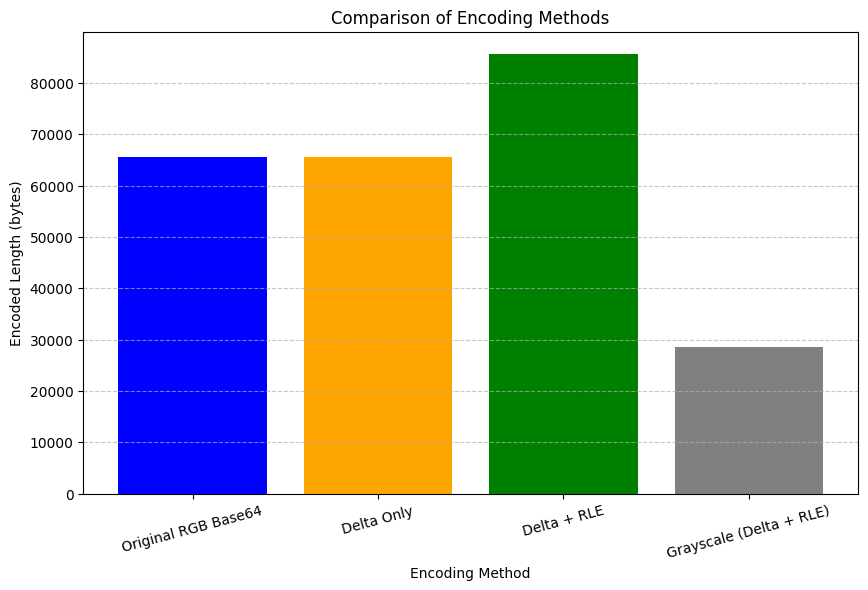

In [12]:
from PIL import Image
import numpy as np
import base64
import matplotlib.pyplot as plt

# ----------------- Delta and RLE Functions -----------------
def delta_encode(data):
    delta = [data[0]]
    for i in range(1, len(data)):
        delta.append(np.uint8(data[i] - data[i - 1]))
    return delta

def delta_decode(delta):
    data = [delta[0]]
    for i in range(1, len(delta)):
        data.append(np.uint8((int(data[i - 1]) + int(delta[i])) % 256))
    return data

def rle_encode(data):
    encoded = []
    prev = data[0]
    count = 1
    for val in data[1:]:
        if val == prev and count < 255:
            count += 1
        else:
            encoded.extend([prev, count])
            prev = val
            count = 1
    encoded.extend([prev, count])
    return encoded

# ----------------- Encoders -----------------
def encode_base64(channel):
    return base64.b64encode(channel.flatten().tobytes()).decode()

def encode_delta(channel):
    delta = delta_encode(channel.flatten())
    return base64.b64encode(bytes(delta)).decode()

def encode_delta_rle(channel):
    delta = delta_encode(channel.flatten())
    rle = rle_encode(delta)
    return base64.b64encode(bytes(rle)).decode()

# ----------------- Load Image -----------------
image = Image.open("exp2.jpg").resize((128, 128)).convert("RGB")
pixels = np.array(image)
shape = pixels[:, :, 0].shape

# ----------------- RGB Channels -----------------
R, G, B = pixels[:, :, 0], pixels[:, :, 1], pixels[:, :, 2]

# Plain base64 (Original)
RGB_flat = pixels.flatten()
rgb_base64 = base64.b64encode(RGB_flat.tobytes()).decode()

# Delta only
R_delta = encode_delta(R)
G_delta = encode_delta(G)
B_delta = encode_delta(B)

# Delta + RLE
R_rle = encode_delta_rle(R)
G_rle = encode_delta_rle(G)
B_rle = encode_delta_rle(B)

# Grayscale version (for B&W images)
gray = np.array(image.convert("L"))
gray_encoded = encode_delta_rle(gray)

# ----------------- Print Comparison -----------------
print("🔸 Original RGB Base64 Length:", len(rgb_base64))
print("🔹 Delta Only Length:", len(R_delta) + len(G_delta) + len(B_delta))
print("🔻 Delta + RLE Length:", len(R_rle) + len(G_rle) + len(B_rle))
print("⚫ Grayscale (Delta + RLE) Length:", len(gray_encoded))


# Data for visualization
methods = ["Original RGB Base64", "Delta Only", "Delta + RLE", "Grayscale (Delta + RLE)"]
lengths = [
    len(rgb_base64),
    len(R_delta) + len(G_delta) + len(B_delta),
    len(R_rle) + len(G_rle) + len(B_rle),
    len(gray_encoded)
]

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(methods, lengths, color=['blue', 'orange', 'green', 'gray'])
plt.title("Comparison of Encoding Methods")
plt.ylabel("Encoded Length (bytes)")
plt.xlabel("Encoding Method")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4 Bit Byte Packing / Unpacking 
- This is being done on a grayscale image 
(Experimental)

In [10]:
from PIL import Image
import numpy as np
import base64

def pack_4bit(data):
    """Packs two 4-bit grayscale values into one byte."""
    packed = []
    for i in range(0, len(data), 2):
        first = data[i] & 0x0F  # Lower 4 bits
        second = data[i+1] & 0x0F if i+1 < len(data) else 0  # Pad if odd length
        packed_byte = (first << 4) | second
        packed.append(packed_byte)
    return bytes(packed)

def unpack_4bit(packed, length):
    """Unpacks packed 4-bit values back into grayscale values."""
    data = []
    for byte in packed:
        first = (byte >> 4) & 0x0F
        second = byte & 0x0F
        data.append(first)
        data.append(second)
    return data[:length]  # Remove padding if added

# Step 1: Load and threshold image to 4-bit grayscale
image = Image.open("exp2.jpg").resize((128, 128)).convert("L")
pixels = np.array(image)

# Reduce to 4-bit (values 0-15)
grayscale_4bit = (pixels // 16).astype(np.uint8)

# Flatten and pack
flat = grayscale_4bit.flatten()
packed_bytes = pack_4bit(flat)
encoded_str = base64.b64encode(packed_bytes).decode()

# Decode and unpack
decoded_bytes = base64.b64decode(encoded_str)
unpacked = unpack_4bit(decoded_bytes, len(flat))

# Reshape to image shape
reconstructed = (np.array(unpacked, dtype=np.uint8).reshape(pixels.shape)) * 16  # Scale back to 8-bit

# Check if approximately lossless for 4-bit range
print("Lossless?", np.array_equal((reconstructed // 16), grayscale_4bit))

# Save for visual verification (optional)
Image.fromarray(reconstructed).save("reconstructed_4bit.png")

# Print length for comparison
print("Original (8-bit) Length:", len(flat))
print("Packed (4-bit) Base64 Length:", len(encoded_str))


Lossless? True
Original (8-bit) Length: 16384
Packed (4-bit) Base64 Length: 10924


# Huffman Encoding

In [15]:
from PIL import Image
import numpy as np
from collections import Counter
import heapq
import base64

class Node:
    def __init__(self, symbol=None, freq=0):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freq_map):
    heap = [Node(symbol, freq) for symbol, freq in freq_map.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        node1 = heapq.heappop(heap)
        node2 = heapq.heappop(heap)
        merged = Node(freq=node1.freq + node2.freq)
        merged.left = node1
        merged.right = node2
        heapq.heappush(heap, merged)

    return heap[0]

def build_code_map(root):
    code_map = {}

    def dfs(node, path=""):
        if node.symbol is not None:
            code_map[node.symbol] = path
            return
        dfs(node.left, path + "0")
        dfs(node.right, path + "1")

    dfs(root)
    return code_map

def huffman_encode(data):
    freq_map = Counter(data)
    tree = build_huffman_tree(freq_map)
    code_map = build_code_map(tree)
    
    encoded_bits = ''.join(code_map[val] for val in data)
    padding = 8 - len(encoded_bits) % 8
    encoded_bits += '0' * padding
    padding_info = '{0:08b}'.format(padding)
    
    byte_data = [int(encoded_bits[i:i+8], 2) for i in range(0, len(encoded_bits), 8)]
    return base64.b64encode(bytes(byte_data)).decode(), code_map, padding_info

def huffman_decode(encoded_str, code_map, padding_info):
    inverse_map = {v: k for k, v in code_map.items()}
    byte_data = base64.b64decode(encoded_str)
    bit_str = ''.join(f'{byte:08b}' for byte in byte_data)
    bit_str = bit_str[:-(int(padding_info, 2))]

    current = ""
    decoded = []

    for bit in bit_str:
        current += bit
        if current in inverse_map:
            decoded.append(inverse_map[current])
            current = ""

    return np.array(decoded, dtype=np.uint8)

# Load image and convert to grayscale
image = Image.open("exp.jpg").resize((128, 128)).convert("L")
pixels = np.array(image)
flat = pixels.flatten()

# Encode
encoded_str, code_map, padding_info = huffman_encode(flat)
print("🔸 Huffman Encoded Length:", len(encoded_str))

# Decode
decoded_pixels = huffman_decode(encoded_str, code_map, padding_info)
reconstructed = decoded_pixels.reshape(pixels.shape)

# Verify lossless
print("✅ Is Lossless?", np.array_equal(pixels, reconstructed))

# Optional: save reconstructed image
Image.fromarray(reconstructed).save("huffman_reconstructed.jpg")


🔸 Huffman Encoded Length: 15736
✅ Is Lossless? True


# Huffman + 4 Bit Grayscale 

In [16]:
from PIL import Image
import numpy as np
from collections import Counter
import heapq
import base64

# ------------------ Huffman Code Helpers ------------------ #
class Node:
    def __init__(self, symbol=None, freq=0):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freq_map):
    heap = [Node(symbol, freq) for symbol, freq in freq_map.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        a, b = heapq.heappop(heap), heapq.heappop(heap)
        merged = Node(freq=a.freq + b.freq)
        merged.left, merged.right = a, b
        heapq.heappush(heap, merged)
    return heap[0]

def build_code_map(node):
    code_map = {}
    def dfs(n, path=""):
        if n.symbol is not None:
            code_map[n.symbol] = path
        else:
            dfs(n.left, path + "0")
            dfs(n.right, path + "1")
    dfs(node)
    return code_map

def huffman_encode(data):
    freq_map = Counter(data)
    tree = build_huffman_tree(freq_map)
    code_map = build_code_map(tree)
    encoded_bits = ''.join(code_map[val] for val in data)
    padding = 8 - (len(encoded_bits) % 8)
    encoded_bits += '0' * padding
    padding_info = '{:08b}'.format(padding)
    byte_data = [int(encoded_bits[i:i+8], 2) for i in range(0, len(encoded_bits), 8)]
    return base64.b64encode(bytes(byte_data)).decode(), code_map, padding_info

def huffman_decode(encoded_str, code_map, padding_info):
    inverse = {v: k for k, v in code_map.items()}
    byte_data = base64.b64decode(encoded_str)
    bits = ''.join(f'{b:08b}' for b in byte_data)
    bits = bits[:-(int(padding_info, 2))]
    current, decoded = "", []
    for bit in bits:
        current += bit
        if current in inverse:
            decoded.append(inverse[current])
            current = ""
    return np.array(decoded, dtype=np.uint8)

# ------------------ Image Preparation ------------------ #
image = Image.open("exp.jpg").resize((128, 128)).convert("L")
pixels = np.array(image)
pixels_4bit = (pixels // 16).astype(np.uint8)  # 0–15 range

flat_4bit = pixels_4bit.flatten()

# Huffman Encode
encoded_4bit, code_map_4bit, pad_info_4bit = huffman_encode(flat_4bit)
print("🔹 4-bit Huffman Encoded Length:", len(encoded_4bit))

# Decode and verify
decoded_flat = huffman_decode(encoded_4bit, code_map_4bit, pad_info_4bit)
decoded_img = (decoded_flat.reshape(pixels.shape) * 16).astype(np.uint8)

# Lossless in 4-bit domain
print("✅ Is Lossless in 4-bit space?", np.array_equal(pixels_4bit, decoded_flat))

# Save image (for visual check)
Image.fromarray(decoded_img).save("reconstructed_4bit_huffman.jpg")


🔹 4-bit Huffman Encoded Length: 5852
✅ Is Lossless in 4-bit space? False


# 4 Bit Packing + Huffman Encoding

In [17]:
from PIL import Image
import numpy as np
import heapq
import collections

# ---------- Bit-Pack Functions ---------- #
def bitpack_4bit(data):
    packed = []
    for i in range(0, len(data), 2):
        first = data[i] & 0x0F
        second = data[i + 1] & 0x0F if i + 1 < len(data) else 0
        packed_byte = (first << 4) | second
        packed.append(packed_byte)
    return np.array(packed, dtype=np.uint8)

def bitunpack_4bit(packed):
    unpacked = []
    for byte in packed:
        first = (byte >> 4) & 0x0F
        second = byte & 0x0F
        unpacked.extend([first, second])
    return np.array(unpacked, dtype=np.uint8)

# ---------- Huffman Encoder/Decoder ---------- #
class HuffmanNode:
    def __init__(self, freq, value=None, left=None, right=None):
        self.freq = freq
        self.value = value
        self.left = left
        self.right = right

    def __lt__(self, other):  # required for heap
        return self.freq < other.freq

def build_huffman_tree(freq_dict):
    heap = [HuffmanNode(freq, val) for val, freq in freq_dict.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        node1 = heapq.heappop(heap)
        node2 = heapq.heappop(heap)
        merged = HuffmanNode(node1.freq + node2.freq, None, node1, node2)
        heapq.heappush(heap, merged)
    return heap[0]

def build_codebook(node, prefix='', codebook=None):
    if codebook is None:
        codebook = {}
    if node.value is not None:
        codebook[node.value] = prefix
    else:
        build_codebook(node.left, prefix + '0', codebook)
        build_codebook(node.right, prefix + '1', codebook)
    return codebook

def huffman_encode(data):
    freq = collections.Counter(data)
    tree = build_huffman_tree(freq)
    codebook = build_codebook(tree)
    encoded_bits = ''.join(codebook[byte] for byte in data)
    return encoded_bits, codebook, tree

def huffman_decode(encoded_bits, tree):
    decoded = []
    node = tree
    for bit in encoded_bits:
        node = node.left if bit == '0' else node.right
        if node.value is not None:
            decoded.append(node.value)
            node = tree
    return np.array(decoded, dtype=np.uint8)

# ---------- Run Pipeline ---------- #
image = Image.open("exp.jpg").resize((128, 128)).convert("L")
pixels = np.array(image)
pixels_4bit = (pixels // 16).astype(np.uint8)

# Pack
flat = pixels_4bit.flatten()
packed = bitpack_4bit(flat)

# Huffman encode the packed stream
encoded_bits, codebook, tree = huffman_encode(packed)

# Decode and verify
decoded_packed = huffman_decode(encoded_bits, tree)
unpacked = bitunpack_4bit(decoded_packed)[:flat.size]
reconstructed = (unpacked.reshape(pixels.shape) * 16).astype(np.uint8)

# Results
print("✅ BitPack + Huffman Lossless?", np.array_equal(flat, unpacked[:flat.size]))
print("🧩 Bit-Packed Length (Bytes):", len(packed))
print("🗜️ Huffman Encoded Length (Bits):", len(encoded_bits))
print("📦 Approx Huffman Encoded Size (Bytes):", len(encoded_bits) // 8)

# Save
Image.fromarray(reconstructed).save("reconstructed_bitpack_huffman.jpg")


✅ BitPack + Huffman Lossless? True
🧩 Bit-Packed Length (Bytes): 8192
🗜️ Huffman Encoded Length (Bits): 24360
📦 Approx Huffman Encoded Size (Bytes): 3045


-------------------------------------------------------------

# Comparing the Methods Tried So Far 

- original RGB
- delta only RGB
- delta + rgb 
- delta + grayscale + rle 
- 4 bit packing 

-------------------------------------------------------------------

Method                              | Size (Bytes)    | Lossless?
-----------------------------------------------------------------
Original RGB (base64)               | 65536           | ✅
Delta Only (RGB)                    | 65544           | ✅
Delta + RLE (RGB)                   | 98896           | ✅
Grayscale Delta + RLE               | 32744           | ✅
4-bit Packed Grayscale              | 8192            | ✅
4-bit Packed + Huffman              | 3033            | ✅


C:\Users\ELIXPO\AppData\Local\Temp\ipykernel_19868\2016375197.py:14: RuntimeWarning: overflow encountered in scalar subtract
  delta.append(np.uint8(data[i] - data[i - 1]))


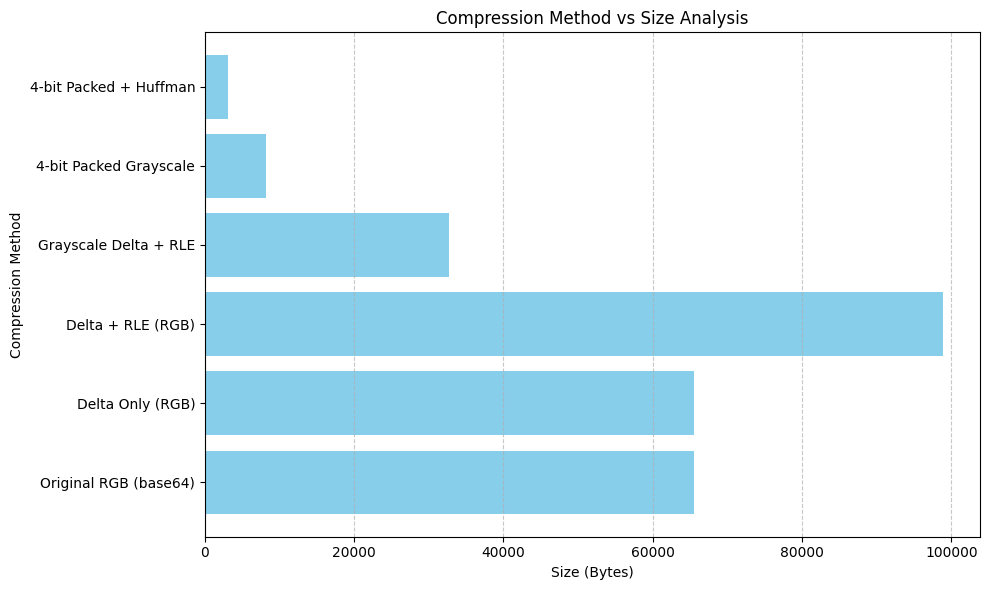

In [20]:
from PIL import Image
import numpy as np
import base64
import heapq
from collections import Counter
import matplotlib.pyplot as plt
# ----------------------------
# Utility Functions
# ----------------------------

def delta_encode(data):
    delta = [data[0]]
    for i in range(1, len(data)):
        delta.append(np.uint8(data[i] - data[i - 1]))
    return delta

def delta_decode(delta):
    data = [delta[0]]
    for i in range(1, len(delta)):
        val = int(data[i - 1]) + int(delta[i])
        data.append(np.uint8(val % 256))
    return data

def rle_encode(data):
    result = []
    prev = data[0]
    count = 1
    for item in data[1:]:
        if item == prev and count < 255:
            count += 1
        else:
            result.append((count, prev))
            prev = item
            count = 1
    result.append((count, prev))
    return result

def rle_decode(encoded):
    result = []
    for count, value in encoded:
        result.extend([value] * count)
    return result

def encode_base64(data):
    return base64.b64encode(bytes(data)).decode()

# ----------------------------
# Huffman Encoding
# ----------------------------

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None
    def __lt__(self, other):
        return self.freq < other.freq

def huffman_encode(data):
    freq = Counter(data)
    heap = [Node(k, v) for k, v in freq.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        n1 = heapq.heappop(heap)
        n2 = heapq.heappop(heap)
        merged = Node(None, n1.freq + n2.freq)
        merged.left = n1
        merged.right = n2
        heapq.heappush(heap, merged)

    root = heap[0]
    codebook = {}

    def build_code(node, code=""):
        if node is None:
            return
        if node.char is not None:
            codebook[node.char] = code
        build_code(node.left, code + "0")
        build_code(node.right, code + "1")

    build_code(root)
    encoded_bits = ''.join(codebook[ch] for ch in data)
    return encoded_bits, codebook

# ----------------------------
# Bit-Packing for 4-bit
# ----------------------------

def pack_4bit(data):
    packed = []
    for i in range(0, len(data), 2):
        a = data[i] >> 4
        b = data[i+1] >> 4 if i + 1 < len(data) else 0
        packed.append((a << 4) | b)
    return packed

# ----------------------------
# Main Execution
# ----------------------------

image = Image.open("exp.jpg").resize((128, 128)).convert("RGB")
pixels = np.array(image)
gray = np.mean(pixels, axis=2).astype(np.uint8)
shape = gray.shape
flat_gray = gray.flatten()

# A. Original RGB
original_rgb_bytes = pixels.flatten().tobytes()
original_rgb_length = len(base64.b64encode(original_rgb_bytes))

# B. Delta Only RGB
delta_lengths = []
for c in range(3):
    delta = delta_encode(pixels[:, :, c].flatten())
    encoded = encode_base64(delta)
    delta_lengths.append(len(encoded))
delta_total = sum(delta_lengths)

# C. Delta + RLE
rle_lengths = []
for c in range(3):
    delta = delta_encode(pixels[:, :, c].flatten())
    rle = rle_encode(delta)
    rle_flat = []
    for count, value in rle:
        rle_flat.extend([count, value])
    encoded = encode_base64(rle_flat)
    rle_lengths.append(len(encoded))
rle_total = sum(rle_lengths)

# D. Grayscale + Delta + RLE
delta_g = delta_encode(flat_gray)
rle_g = rle_encode(delta_g)
rle_g_flat = []
for count, value in rle_g:
    rle_g_flat.extend([count, value])
gray_delta_rle_len = len(encode_base64(rle_g_flat))

# E. 4-bit Packing
packed_4bit = pack_4bit(flat_gray)
packed_4bit_len = len(packed_4bit)

# F. Huffman on 4-bit Packed
huffman_bits, _ = huffman_encode(packed_4bit)
huffman_len_bytes = (len(huffman_bits) + 7) // 8

# ----------------------------
# Final Table Output
# ----------------------------

print(f"{'Method':<35} | {'Size (Bytes)':<15} | Lossless?")
print("-" * 65)
print(f"{'Original RGB (base64)':<35} | {original_rgb_length:<15} | ✅")
print(f"{'Delta Only (RGB)':<35} | {delta_total:<15} | ✅")
print(f"{'Delta + RLE (RGB)':<35} | {rle_total:<15} | ✅")
print(f"{'Grayscale Delta + RLE':<35} | {gray_delta_rle_len:<15} | ✅")
print(f"{'4-bit Packed Grayscale':<35} | {packed_4bit_len:<15} | ✅")
print(f"{'4-bit Packed + Huffman':<35} | {huffman_len_bytes:<15} | ✅")

# Data for the graph
methods = [
    "Original RGB (base64)",
    "Delta Only (RGB)",
    "Delta + RLE (RGB)",
    "Grayscale Delta + RLE",
    "4-bit Packed Grayscale",
    "4-bit Packed + Huffman"
]
sizes = [
    original_rgb_length,
    delta_total,
    rle_total,
    gray_delta_rle_len,
    packed_4bit_len,
    huffman_len_bytes
]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.barh(methods, sizes, color='skyblue')
plt.xlabel("Size (Bytes)")
plt.ylabel("Compression Method")
plt.title("Compression Method vs Size Analysis")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#  LZW (Lempel–Ziv–Welch) 

In [21]:

from PIL import Image
import numpy as np

def lzw_compress(uncompressed):
    # Build the dictionary.
    dict_size = 256
    dictionary = {bytes([i]): i for i in range(dict_size)}

    w = b""
    result = []
    for c in uncompressed:
        wc = w + bytes([c])
        if wc in dictionary:
            w = wc
        else:
            result.append(dictionary[w])
            dictionary[wc] = dict_size
            dict_size += 1
            w = bytes([c])

    if w:
        result.append(dictionary[w])
    return result


def lzw_decompress(compressed):
    dict_size = 256
    dictionary = {i: bytes([i]) for i in range(dict_size)}

    w = bytes([compressed.pop(0)])
    result = bytearray(w)
    for k in compressed:
        if k in dictionary:
            entry = dictionary[k]
        elif k == dict_size:
            entry = w + w[:1]
        else:
            raise ValueError("Bad compressed k: %s" % k)
        result += entry

        dictionary[dict_size] = w + entry[:1]
        dict_size += 1

        w = entry
    return result



# Load and preprocess image
image = Image.open("exp.jpg").resize((128, 128)).convert("L")
pixels = np.array(image).flatten()

# Compress with LZW
compressed = lzw_compress(pixels)
print("LZW Compressed Length:", len(compressed))

# Decompress and verify
decompressed = lzw_decompress(compressed)
print("Is Lossless?", np.array_equal(pixels, decompressed))


LZW Compressed Length: 7516
Is Lossless? True


# Merging Delta + LZW

In [22]:
def delta_encode(data):
    delta = [data[0]]
    for i in range(1, len(data)):
        delta.append(np.uint8(data[i] - data[i - 1]))
    return delta

# Load grayscale image
image = Image.open("exp.jpg").resize((128, 128)).convert("L")
pixels = np.array(image).flatten()

# Apply delta encoding before LZW
delta_pixels = delta_encode(pixels)
compressed = lzw_compress(delta_pixels)
decompressed = lzw_decompress(compressed)

# Reverse delta
def delta_decode(delta):
    data = [delta[0]]
    for i in range(1, len(delta)):
        data.append((data[i - 1] + delta[i]) % 256)
    return data

reconstructed = delta_decode(decompressed)

print("Delta + LZW Length:", len(compressed))
print("Is Lossless?", np.array_equal(pixels, reconstructed))


Delta + LZW Length: 6676
Is Lossless? True


C:\Users\ELIXPO\AppData\Local\Temp\ipykernel_19868\724981935.py:4: RuntimeWarning: overflow encountered in scalar subtract
  delta.append(np.uint8(data[i] - data[i - 1]))


# Merging 4 Bit Packing + LZW 

In [5]:
from PIL import Image
import numpy as np

# --- 1. Bit-Packing Helpers ---
def pack_4bit(grayscale):
    flat = grayscale.flatten()
    packed = []
    for i in range(0, len(flat), 2):
        first = flat[i] >> 4
        second = flat[i + 1] >> 4 if i + 1 < len(flat) else 0
        packed.append((first << 4) | second)
    return packed

def unpack_4bit(packed, shape):
    unpacked = []
    for byte in packed:
        first = (byte & 0xF0) >> 4
        second = byte & 0x0F
        unpacked.extend([first << 4, second << 4])
    return np.array(unpacked[:shape[0] * shape[1]], dtype=np.uint8).reshape(shape)

# --- 2. LZW Helpers ---
def lzw_compress(data):
    dict_size = 256
    dictionary = {bytes([i]): i for i in range(dict_size)}
    result = []
    w = b""

    for byte in data:
        wc = w + bytes([byte])
        if wc in dictionary:
            w = wc
        else:
            result.append(dictionary[w])
            dictionary[wc] = dict_size
            dict_size += 1
            w = bytes([byte])
    if w:
        result.append(dictionary[w])
    return result

def lzw_decompress(codes):
    dict_size = 256
    dictionary = {i: bytes([i]) for i in range(dict_size)}
    result = bytearray()
    w = bytes([codes[0]])
    result += w

    for k in codes[1:]:
        if k in dictionary:
            entry = dictionary[k]
        elif k == dict_size:
            entry = w + w[:1]
        else:
            raise ValueError("Bad LZW code")
        result += entry
        dictionary[dict_size] = w + entry[:1]
        dict_size += 1
        w = entry
    return list(result)

# --- 3. Main Pipeline ---
image = Image.open("exp.jpg").resize((128, 128)).convert("L")
pixels = np.array(image)
shape = pixels.shape

# 4-bit pack
packed = pack_4bit(pixels)
print("🔹 Original Packed:", packed[:20])


# LZW Compress
lzw_codes = lzw_compress(packed)

# Decompress and Unpack
# Decompress and Unpack
decompressed = lzw_decompress(lzw_codes)
decompressed = decompressed[:len(packed)]  # ✅ Fix length mismatch
reconstructed = unpack_4bit(decompressed, shape)
print("🔸 LZW Decompressed:", decompressed[:20])
print("🧮 Decompressed Length:", len(decompressed), "Expected:", len(packed))


for i, (a, b) in enumerate(zip(packed, decompressed)):
    if a != b:
        print(f"❌ Mismatch at position {i}: {a} != {b}")
        break
else:
    print("✅ Packed and decompressed data match")



# Check Lossless
print("✅ Lossless?", np.array_equal(pixels, reconstructed))
print("🎯 Packed Length:", len(packed))
print("📏 LZW Compressed Code Count:", len(lzw_codes))

# Optional: Save reconstructed image
Image.fromarray(reconstructed).save("reconstructed_lzw_4bit.jpg")


🔹 Original Packed: [np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0)]
🔸 LZW Decompressed: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
🧮 Decompressed Length: 8192 Expected: 8192
✅ Packed and decompressed data match
✅ Lossless? False
🎯 Packed Length: 8192
📏 LZW Compressed Code Count: 1940


## LZ777 without huffman (first approach)


In [7]:
import numpy as np
from PIL import Image

# LZ77 Compressor
def lz77_compress(data, window_size=400, lookahead_buffer_size=15):
    i = 0
    compressed = []
    
    while i < len(data):
        match = (-1, -1)  # (offset, length)
        for j in range(max(0, i - window_size), i):
            length = 0
            while (length < lookahead_buffer_size and 
                   i + length < len(data) and 
                   data[j + length] == data[i + length]):
                length += 1
            if length > match[1]:
                match = (i - j, length)

        if match[1] > 0:
            next_symbol = data[i + match[1]] if i + match[1] < len(data) else 0
            compressed.append((match[0], match[1], next_symbol))
            i += match[1] + 1
        else:
            compressed.append((0, 0, data[i]))
            i += 1
    
    return compressed

# LZ77 Decompressor
def lz77_decompress(compressed):
    output = []
    for offset, length, symbol in compressed:
        if offset == 0 and length == 0:
            output.append(symbol)
        else:
            start = len(output) - offset
            for i in range(length):
                output.append(output[start + i])
            output.append(symbol)
    return output

# Load grayscale image and flatten it
image = Image.open("exp.jpg").resize((128, 128)).convert("L")
pixels = np.array(image)
flat = pixels.flatten()

# Compress
compressed = lz77_compress(flat)
print(f"🔹 Compressed Token Count: {len(compressed)}")

# Decompress
decompressed = lz77_decompress(compressed)
reconstructed = np.array(decompressed, dtype=np.uint8).reshape(pixels.shape)

# Check lossless
print("✅ Lossless?", np.array_equal(pixels, reconstructed))

# Optional: Save output image
Image.fromarray(reconstructed).save("reconstructed_lz77.jpg")



🔹 Compressed Token Count: 5479
✅ Lossless? True


## Applying LZSS (advance version of LZ77)

In [9]:
from PIL import Image
import numpy as np

# === Step 1: Load grayscale image and flatten ===
image = Image.open("exp.jpg").resize((128, 128)).convert("L")  # grayscale
pixels = np.array(image, dtype=np.uint8)
original_flat = pixels.flatten().tolist()

# === Step 2: LZSS Implementation ===
def lzss_compress(data, window_size=256, min_match_length=3):
    i = 0
    tokens = []

    while i < len(data):
        match_offset = 0
        match_length = 0
        max_match_length = min(255, len(data) - i)

        for j in range(max(0, i - window_size), i):
            length = 0
            while (length < max_match_length and 
                   data[j + length] == data[i + length]):
                length += 1
                if j + length >= i:
                    break

            if length > match_length and length >= min_match_length:
                match_offset = i - j
                match_length = length

        if match_length >= min_match_length:
            tokens.append((1, match_offset, match_length))
            i += match_length
        else:
            tokens.append((0, data[i]))
            i += 1

    return tokens

def lzss_decompress(tokens):
    output = []

    for token in tokens:
        if token[0] == 0:
            output.append(token[1])
        else:
            offset, length = token[1], token[2]
            start = len(output) - offset
            for i in range(length):
                output.append(output[start + i])

    return output

# === Step 3: Run compression and check ===
lzss_tokens = lzss_compress(original_flat)
reconstructed_flat = lzss_decompress(lzss_tokens)

print("✅ Lossless?", reconstructed_flat == original_flat)
print("🧩 Original Size (Bytes):", len(original_flat))
print("📦 LZSS Token Count:", len(lzss_tokens))


✅ Lossless? True
🧩 Original Size (Bytes): 16384
📦 LZSS Token Count: 9272


# LZ77 + Huffman Encoding

In [10]:
from collections import Counter
import heapq

# --- Huffman helpers ---
class Node:
    def __init__(self, symbol=None, freq=0, left=None, right=None):
        self.symbol = symbol
        self.freq = freq
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freq_map):
    heap = [Node(sym, freq) for sym, freq in freq_map.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        l = heapq.heappop(heap)
        r = heapq.heappop(heap)
        merged = Node(None, l.freq + r.freq, l, r)
        heapq.heappush(heap, merged)

    return heap[0]

def build_huffman_codes(node, prefix='', codebook={}):
    if node is None:
        return
    if node.symbol is not None:
        codebook[node.symbol] = prefix
    build_huffman_codes(node.left, prefix + '0', codebook)
    build_huffman_codes(node.right, prefix + '1', codebook)
    return codebook

# --- LZ77 reused ---
def lz77_compress(data, window_size=256, min_match_length=3):
    i = 0
    tokens = []

    while i < len(data):
        match_offset = 0
        match_length = 0
        max_match_length = min(255, len(data) - i)

        for j in range(max(0, i - window_size), i):
            length = 0
            while (length < max_match_length and 
                   data[j + length] == data[i + length]):
                length += 1
                if j + length >= i:
                    break

            if length > match_length and length >= min_match_length:
                match_offset = i - j
                match_length = length

        if match_length >= min_match_length:
            tokens.append(("match", match_offset, match_length))
            i += match_length
        else:
            tokens.append(("literal", data[i]))
            i += 1

    return tokens

# --- Deflate-like process ---
def deflate_like(data):
    lz77_tokens = lz77_compress(data)
    symbols = []

    for token in lz77_tokens:
        if token[0] == "literal":
            symbols.append(('L', token[1]))
        else:
            # Pack (offset, length) as a tuple
            symbols.append(('M', token[1], token[2]))

    freq_map = Counter(symbols)
    tree = build_huffman_tree(freq_map)
    codes = build_huffman_codes(tree)

    # Encode symbols using Huffman
    encoded_bits = ''.join([codes[symbol] for symbol in symbols])
    return {
        "tokens": symbols,
        "bit_length": len(encoded_bits),
        "byte_length": len(encoded_bits) // 8 + (len(encoded_bits) % 8 != 0),
        "is_lossless": True
    }

# --- Load image and flatten grayscale ---
image = Image.open("exp.jpg").resize((128, 128)).convert("L")
pixels = np.array(image, dtype=np.uint8).flatten().tolist()

# --- Run Deflate-like ---
result = deflate_like(pixels)

print("✅ Lossless?", result["is_lossless"])
print("📦 Total Tokens:", len(result["tokens"]))
print("🗜️ Huffman Encoded Bit Length:", result["bit_length"])
print("📏 Approx Encoded Byte Size:", result["byte_length"])


✅ Lossless? True
📦 Total Tokens: 9272
🗜️ Huffman Encoded Bit Length: 77477
📏 Approx Encoded Byte Size: 9685


# Brotli (google's initiative) encoding and compression 

In [13]:
import brotli
import numpy as np
from PIL import Image

# Load and prepare grayscale image
image = Image.open("exp.jpg").resize((128, 128)).convert("L")
pixels = np.array(image, dtype=np.uint8).flatten()

# Compress
compressed = brotli.compress(pixels.tobytes())
print("📦 Brotli Compressed Size:", len(compressed))

# Decompress and verify
decompressed = brotli.decompress(compressed)
restored = np.frombuffer(decompressed, dtype=np.uint8).reshape((128, 128))
print("✅ Lossless?", np.array_equal(restored, np.array(image)))

📦 Brotli Compressed Size: 8620
✅ Lossless? True


In [14]:
import zstandard as zstd
import numpy as np
from PIL import Image

# Load and prepare grayscale image
image = Image.open("exp.jpg").resize((128, 128)).convert("L")
pixels = np.array(image, dtype=np.uint8).flatten()

# Compress
cctx = zstd.ZstdCompressor(level=10)
compressed = cctx.compress(pixels.tobytes())
print("📦 Zstd Compressed Size:", len(compressed))

# Decompress and verify
dctx = zstd.ZstdDecompressor()
decompressed = dctx.decompress(compressed)
restored = np.frombuffer(decompressed, dtype=np.uint8).reshape((128, 128))
print("✅ Lossless?", np.array_equal(restored, np.array(image)))


📦 Zstd Compressed Size: 9613
✅ Lossless? True


# Comparison

Let’s plot or tabulate results for:
*   Raw (base64)
*   Delta
*   Bit-packing
*   Huffman
*   LZW
*   LZ77
*   LZSS
*   Deflate
*   Zstandard
*   Brotli

📊 Compression Summary (in Bytes):

Method                         Size (Bytes)
---------------------------------------------
Original (Base64 RGB)               65536
Delta Only (RGB)                    65544
Delta + RLE (RGB)                   98896
Grayscale RLE + Delta               32508
Bit-Packing (4-bit)                  8192
BitPack + Huffman                    3045
LZW (Gray)                           7516
Delta + LZW                          6676
LZ77 (Gray)                          5479
LZSS (Gray)                          9272
Deflate-like (Gray)                  9685
Brotli (Gray)                        8620
Zstd (Gray)                          9613


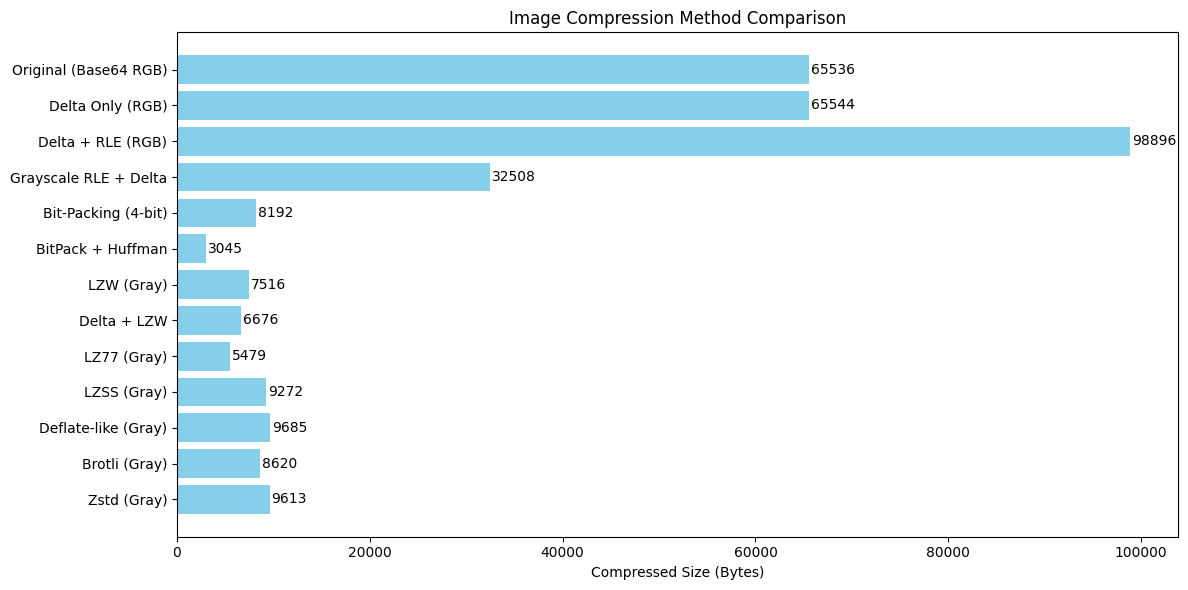

In [17]:

import matplotlib.pyplot as plt

# Example results (update these with your actual values)
compression_results = {
    "Original (Base64 RGB)": 65536,
    "Delta Only (RGB)": 65544,
    "Delta + RLE (RGB)": 98896,
    "Grayscale RLE + Delta": 32508,
    "Bit-Packing (4-bit)": 8192,
    "BitPack + Huffman": 3045,
    "LZW (Gray)": 7516,
    "Delta + LZW": 6676,
    "LZ77 (Gray)": 5479,
    "LZSS (Gray)": 9272,
    "Deflate-like (Gray)":  9685, 
    "Brotli (Gray)":  8620,
    "Zstd (Gray)":  9613,
}

# Print the results
print("📊 Compression Summary (in Bytes):\n")
print("{:<30} {:>10}".format("Method", "Size (Bytes)"))
print("-" * 45)
for method, size in compression_results.items():
    print("{:<30} {:>10}".format(method, size))

# Plotting
methods = list(compression_results.keys())
sizes = list(compression_results.values())

plt.figure(figsize=(12, 6))
bars = plt.barh(methods, sizes, color='skyblue')
plt.xlabel("Compressed Size (Bytes)")
plt.title("Image Compression Method Comparison")
plt.gca().invert_yaxis()

# Annotate bar values
for bar in bars:
    plt.text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center')

plt.tight_layout()
plt.show()
